# let's plot some baytemps

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [2]:
# read in the steez data

stz = pd.read_csv('results.csv', parse_dates=True, index_col='Time')
stz.drop(columns='No.', inplace=True)

stz.Temp = pd.to_numeric(stz.Temp,errors='coerce')

stz['TempC'] = (stz.Temp - 32)*5/9

stz.head()

,Temp,TempC
Time,,
2020-01-17 09:11:39,59.7,15.388889
2020-01-17 09:26:39,53.4,11.888889
2020-01-17 09:41:39,53.0,11.666667
2020-01-17 09:56:39,52.8,11.555556
2020-01-17 10:11:39,52.8,11.555556


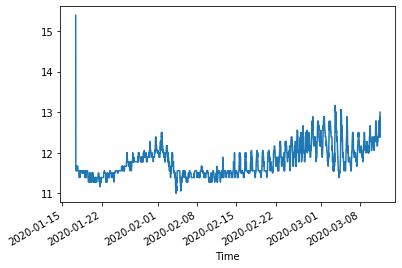

In [3]:
stz.TempC.plot()

# get NDBC buoy data:
station page:
https://www.ndbc.noaa.gov/station_page.php?station=ftpc1


THREDDS data:
https://dods.ndbc.noaa.gov/thredds/catalog/data/stdmet/ftpc1/catalog.html



In [4]:
fname = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/ftpc1/ftpc1h9999.nc'

ds = xr.open_dataset(fname)


ds

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 646991)
Coordinates:
  * time                     (time) datetime64[ns] 2012-09-30T23:42:00 ... 2020-03-16T12:30:00
  * latitude                 (latitude) float32 37.807
  * longitude                (longitude) float32 -122.465
Data variables:
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    mean_wave_dir            (time, latitude, longitude) float64 ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with daily manual QC
    conventions:                     COARDS
    station:                         ftpc1
    comment:                         9414290 - San Francisco, CA
    location:                        37.807 N 122.465 W 
    site_elevation:                  2.700000m
    anemometer_height:               7.3m
    air_temperature_height:          6.2m
    water_temperature_depth:         1.2m
    DODS_EXTRA.Unlimited_Dimension:  time

In [5]:
ds.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 646991, latitude: 1, longitude: 1)>
[646991 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2012-09-30T23:42:00 ... 2020-03-16T12:30:00
  * latitude   (latitude) float32 37.807
  * longitude  (longitude) float32 -122.465
Attributes:
    long_name:      Sea Surface Temperature
    short_name:     wtmp
    standard_name:  sea_surface_temperature
    units:          degree_Celsius

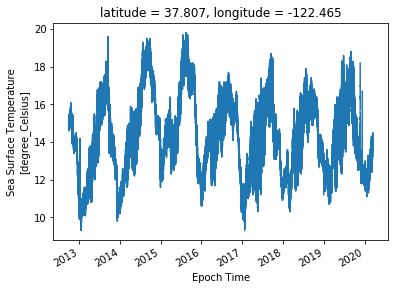

In [6]:
ds.sea_surface_temperature.plot()

# NDBC timezone is UTC

need to convert to GMT -7, or from 


(10.5, 15)

/Users/beaird/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


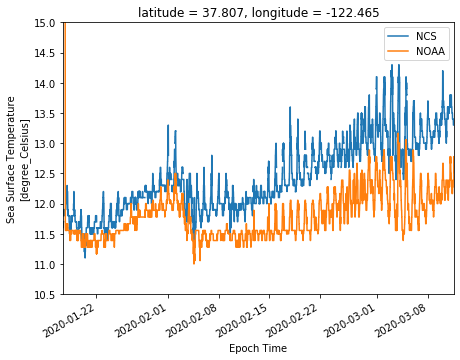

In [14]:


plt.figure(figsize=(7,5))
ds.sea_surface_temperature.plot(label='NCS')

plt.plot(stz.index + pd.Timedelta(7, unit='h'), stz.TempC, label='NOAA')

plt.legend()

plt.xlim([stz.index.min(), stz.index.max()])
# plt.xlim([pd.datetime(2020,2,15), pd.datetime(2020,2,20)])
plt.ylim([10.5, 15])
